<a href="https://colab.research.google.com/github/Ashish-sancheti/Learnings/blob/main/CovidDataAnalysisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Acquisition

The data present in this analysis was taken from the website ourworldindata.org. The data is related to the whole world until July 18th, 2022. 

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

Uploading Data to Google Colab

In [130]:
from google.colab import files
files.upload()

{}

### **Data Reading**

This section does preliminary data exploration to gauge the extent and size of dataset. Also to determine the usability of data.

In [131]:
data = pd.read_csv("/owid-covid-data.csv")

In [132]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202181,ZWE,Africa,Zimbabwe,2022-07-14,256047.0,66.0,34.571,5566.0,1.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
202182,ZWE,Africa,Zimbabwe,2022-07-15,256083.0,36.0,27.429,5566.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
202183,ZWE,Africa,Zimbabwe,2022-07-16,256083.0,0.0,22.714,5566.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
202184,ZWE,Africa,Zimbabwe,2022-07-17,256083.0,0.0,20.571,5566.0,0.0,0.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [133]:
data.shape

(202186, 67)

In [134]:
data.columns  # Looking at columns to know the variables

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [135]:
data_type = pd.DataFrame(data.dtypes) # Coverting data.dtypes to pandas DataFrame gives more exploratory freedom 

In [136]:
type(data_type)

pandas.core.frame.DataFrame

In [137]:
data_type.style # .style function shows the whole dataset in detail

,0
iso_code,object
continent,object
location,object
date,object
total_cases,float64
new_cases,float64
new_cases_smoothed,float64
total_deaths,float64
new_deaths,float64
new_deaths_smoothed,float64


In [138]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


By looking the the first 5 rows, we can gauge that there are plenty of null values in the dataset. We are going to work on it now. Let's see the percentage of null values in our dataset.

In [139]:
# Knowing the percentage of null values in our dataset

data.isnull().sum()/data.shape[0]

iso_code                                   0.000000
continent                                  0.057922
location                                   0.000000
date                                       0.000000
total_cases                                0.039894
                                             ...   
human_development_index                    0.198228
excess_mortality_cumulative_absolute       0.966140
excess_mortality_cumulative                0.966140
excess_mortality                           0.966140
excess_mortality_cumulative_per_million    0.966140
Length: 67, dtype: float64

The above exploration shows that the percentage of null values vary accross different columns. Some variables like "location" and "date" have 0 null values while variables like "excess_mortality","excess_mortality_cumulative_per_million" etc. have very high percentage of null value, rendering them not suitable for our use.

Let’s see the ten variables that present null values the most and the least.

In [140]:
(data.isnull().sum()/data.shape[0]).sort_values(ascending = False)[0:11]

weekly_icu_admissions_per_million          0.967569
weekly_icu_admissions                      0.967569
excess_mortality_cumulative_per_million    0.966140
excess_mortality                           0.966140
excess_mortality_cumulative                0.966140
excess_mortality_cumulative_absolute       0.966140
weekly_hosp_admissions                     0.935401
weekly_hosp_admissions_per_million         0.935401
icu_patients                               0.871544
icu_patients_per_million                   0.871544
total_boosters_per_hundred                 0.863448
dtype: float64

In [141]:
(data.isnull().sum()/data.shape[0]).sort_values(ascending = True)[0:11]

iso_code                          0.000000
location                          0.000000
date                              0.000000
population                        0.005985
total_cases                       0.039894
new_cases                         0.041210
total_cases_per_million           0.044311
new_cases_per_million             0.045626
new_cases_smoothed                0.047031
new_cases_smoothed_per_million    0.051423
continent                         0.057922
dtype: float64

In [142]:
(data.isnull().sum()/data.shape[0]).sort_values(ascending = True)[10:21]

continent                          0.057922
life_expectancy                    0.064693
population_density                 0.108885
total_deaths                       0.132339
new_deaths                         0.132536
diabetes_prevalence                0.135578
total_deaths_per_million           0.136691
new_deaths_per_million             0.136889
new_deaths_smoothed                0.138284
new_deaths_smoothed_per_million    0.142611
median_age                         0.174379
dtype: float64

More detailed information is missed but important information like new_cases, total_cases are almost complete and therefore much can be analyzed from this data.

# Data Wrangling


In [143]:
# Converting the date to datetime format

data["date"] = pd.to_datetime(data.date)

In [144]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202181,ZWE,Africa,Zimbabwe,2022-07-14,256047.0,66.0,34.571,5566.0,1.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
202182,ZWE,Africa,Zimbabwe,2022-07-15,256083.0,36.0,27.429,5566.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
202183,ZWE,Africa,Zimbabwe,2022-07-16,256083.0,0.0,22.714,5566.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
202184,ZWE,Africa,Zimbabwe,2022-07-17,256083.0,0.0,20.571,5566.0,0.0,0.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [145]:
data.loc[data["date"] == "18-07-2022"].sort_values(by="total_deaths", ascending = False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
199651,OWID_WRL,NaN,World,2022-07-18,563632472.0,1187532.0,974123.857,6371474.0,1926.0,2082.571,...,6.434,34.635,60.130,2.705,72.58,0.737,NaN,NaN,NaN,NaN
193143,OWID_UMC,NaN,Upper middle income,2022-07-18,134239900.0,97727.0,160526.857,2541159.0,317.0,493.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79952,OWID_HIC,NaN,High income,2022-07-18,335199351.0,1049132.0,770843.143,2470328.0,1499.0,1480.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59409,OWID_EUR,NaN,Europe,2022-07-18,213060552.0,669013.0,402373.000,1871286.0,874.0,677.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134267,OWID_NAM,NaN,North America,2022-07-18,106138218.0,136972.0,165400.000,1470180.0,476.0,689.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62020,FLK,South America,Falkland Islands,2022-07-18,1831.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,81.44,NaN,NaN,NaN,NaN,NaN
115625,MHL,Oceania,Marshall Islands,2022-07-18,49.0,0.0,0.286,NaN,NaN,NaN,...,NaN,NaN,82.502,2.700,73.70,0.704,NaN,NaN,NaN,NaN
118809,FSM,Oceania,Micronesia (country),2022-07-18,38.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67.88,0.620,NaN,NaN,NaN,NaN
152779,SHN,Africa,Saint Helena,2022-07-18,4.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.56,NaN,NaN,NaN,NaN,NaN


It is visible that location variable also includes continents and income levels as a parameter of distinction. Let's find them and drop them in a new dataframe containing only date, location, total_cases, population and total_deaths

Looking at the data, it seems like iso_code which startswith OWID refers to parameters other than countries. Lets check these entries.

In [146]:
dataFrameOut = data[data['iso_code'].str.contains('OWID')]

In [147]:
dataFrameOut.head() # Can check with dataFrameOut.style to look all the rows

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
876,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
879,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
dataFrameOut.shape # These 12885 rows of data needs to be excluded

(12885, 67)

In [149]:
#Taking out the dataFrameOut from the data

df_new = data.merge(dataFrameOut, how='left', indicator=True)
dataFrameIn = df_new[df_new['_merge'] == 'left_only']

In [150]:
df_new.shape

(202186, 68)

In [151]:
dataFrameIn.shape

(189301, 68)

In [152]:
202187-189301 # The whole dataFrameOut(12885 rows) has thus been excluded. Note: 1 extra count is because of index count


12886

In [153]:
dataFrameIn.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,_merge
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,left_only
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,left_only
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,left_only
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,left_only
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,left_only


In [154]:
desc_cases = dataFrameIn.loc[dataFrameIn["date"] == "18-07-2022"].sort_values(by="total_cases", ascending = False)

In [155]:
# Creating new DataFrame with 'date', 'location', 'total_cases', 'population' and 'total_deaths'
Total_cases_descending = desc_cases[["date", "location", "population", "total_cases", "total_deaths"]]

In [156]:
Top5_countries_by_total_cases = Total_cases_descending[:5] # Top 5 countries by total cases
Top5_countries_by_total_cases

,date,location,population,total_cases,total_deaths
191416,2022-07-18,United States,3.369976e+08,89677127.0,1024266.0
84361,2022-07-18,India,1.407564e+09,43783062.0,525785.0
26092,2022-07-18,Brazil,2.143262e+08,33339815.0,675518.0
64730,2022-07-18,France,6.742200e+07,33095351.0,150904.0
69077,2022-07-18,Germany,8.340855e+07,29853680.0,142635.0


In [157]:
desc_deaths = dataFrameIn.loc[dataFrameIn["date"] == "18-07-2022"].sort_values(by="total_deaths", ascending = False)

In [158]:
Total_deaths_descending = desc_deaths[["date", "location", "population", "total_cases", "total_deaths"]]

In [159]:
Top5_countries_by_total_death = Total_deaths_descending[:5] # Top 5 countries by total deaths

That’s a good first approach to know more about the Covid-19 scenario in the world. However, there is a better way to display this information. Let’s plot it! To do so, let’s use Matplotlib library. Let's first plot a histogram of the total number of cases and deaths.

In [160]:
sns.set()

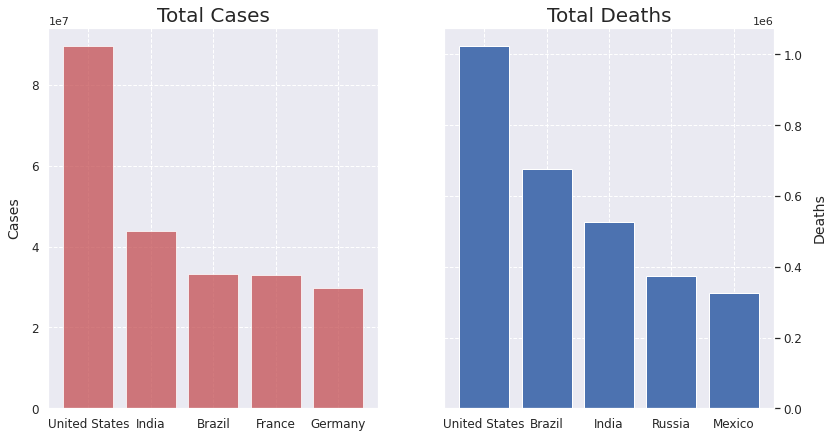

In [161]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (13,7))
ax1.bar(x=Top5_countries_by_total_cases['location'], height = Top5_countries_by_total_cases['total_cases'], facecolor = 'r', alpha = 0.75)
ax1.set_title("Total Cases", fontsize = 20)
ax1.set_ylabel("Cases", fontsize = 14, labelpad=10)
ax1.grid(ls = '--')
ax1.tick_params(labelsize = 12)

ax2.bar(x="location", height = 'total_deaths', data = Top5_countries_by_total_death)
ax2.set_title("Total Deaths", fontsize = 20)
ax2.set_ylabel("Deaths", fontsize = 14, labelpad=10)
ax2.grid(ls = '--')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.tick_params(labelsize = 12)